# 

In [2]:
from Scripts.Make_logistic import *
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [3]:
df = pd.read_excel('Data/Clinical_synthetic.xlsx', index_col=0)
X,y=df.drop(['constrution_year', 'Area', 'floor_level', 'powerplant',
       'road', 'motorway', 'forest', 'coastline', 'airport', 'farmland',
       'industrial', 'carpet', 'cookerhood', 'passive', 'gastove', 'fireplace',
       'corrected_week','scale_formaldehyd', 'scale_acetald', 'scale_vocs',"scaled_vocs",
      'asthma_0_7yrs', 'verificeret_18y', 'verificeret_12y', 'crp_6mo', 'il_1β_6mo', 'il_8_6mo', 'il_6_6mo',
       'tnf_α_6mo', 'urti_1y', 'rti_1y', 'fever_1y', 'gi_1y',
       'lrti_1y','any_1y', 'lrti_3yr', 'urti_3yr', 'rti_3yr', 'fever_3yr', 'gi_3yr',
       'any_3yr'],axis=1),df.asthma_0_7yrs

In [5]:
X.columns

Index(['scaled_nox', 'scaled_no2', 'scaled_formaldehyd', 'scaled_acetone',
       'scaled_acetald', 'scaled_bc', 'scaled_PM25', 'no2_regional',
       'nox_regional', 'pm25_regional', 'no2_street', 'nox_street',
       'pm25_street', 'bmi_6_yrs', 'gestational_age', 'mother's_education_1yr',
       'genetic_risk_score_asthma', 'PCA1', 'PCA2'],
      dtype='object')

In [6]:
performence,kernel,mcmc=nested_cross_baysian_logistic(X,y,2,3,"Models/asthma_adjusted_7_year_")

Sample: 100%|████████████████████████████████████████| 8000/8000 [04:56, 27.01it/s, step size=1.10e-01, acc. prob=0.940]
/data/michaelf/miniconda3/lib/python3.10/site-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  warnings.warn(
posterior predictive shape not compatible with number of chains and draws.This can mean that some draws or even whole chains are not represented.
Sample: 100%|████████████████████████████████████████| 8000/8000 [04:47, 27.87it/s, step size=1.14e-01, acc. prob=0.943]
/data/michaelf/miniconda3/lib/python3.10/site-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  warnings.warn(
posterior predictive shape not compatible with number of chains and draws.This can mean that some draws or even whole chains are n

In [7]:
performence.to_excel("Models/performence_7_adjusted.xlsx")

In [12]:
asthma_1_exposure=az.from_json("Models/asthma_adjusted_7_year_00.json")
asthma_2_exposure=az.from_json("Models/asthma_adjusted_7_year_01.json")
asthma_3_exposure=az.from_json("Models/asthma_adjusted_7_year_10.json")
asthma_4_exposure=az.from_json("Models/asthma_adjusted_7_year_11.json")
asthma_5_exposure=az.from_json("Models/asthma_adjusted_7_year_20.json")
asthma_6_exposure=az.from_json("Models/asthma_adjusted_7_year_21.json")
asthma=az.concat(asthma_1_exposure,asthma_2_exposure,asthma_3_exposure,asthma_4_exposure,asthma_5_exposure,asthma_6_exposure, dim="chain")

In [13]:
asthma["posterior"]["weight"]=np.exp(asthma["posterior"]["weight"])

asthma.posterior = asthma.posterior.assign_coords(
    weight_dim_0=X.columns
)
asthma.to_netcdf("Models/asthma_adjusted_7y.nc")

'Models/asthma_adjusted_7y.nc'

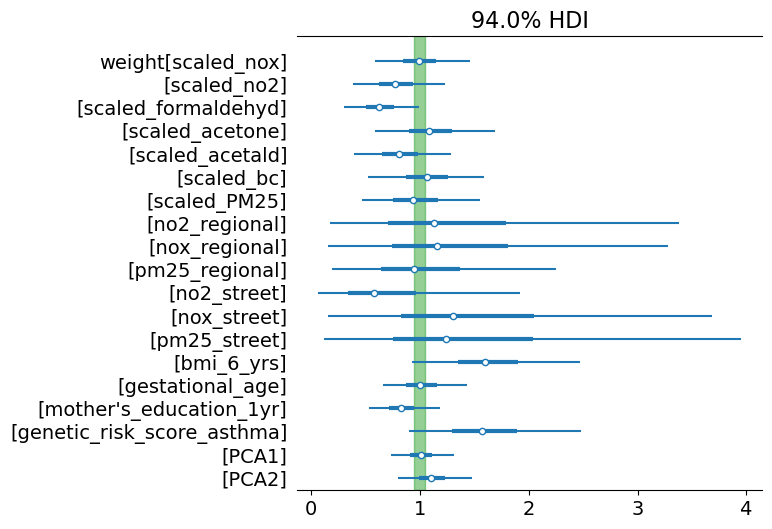

In [14]:
ax = az.plot_forest(
    [asthma], var_names="weight",rope=[0.95,1.05],combined=True)